# **Extracting Features and converting it into a CSV file**

## Importing Libraries

In [1]:
import csv
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from csv import DictWriter

In [2]:
client_credentials_manager = SpotifyClientCredentials(client_id="", client_secret="")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Get Spoti Function

In [3]:
def get_spoti_data(uri):
    track_data = sp.track(uri)
    audio_feats = sp.audio_features(uri)[0]

    artist_name = track_data['artists'][0]['name']

    feats = {
        'artist': artist_name,
        'danceability': audio_feats['danceability'],
        'energy': audio_feats['energy'],
        'key': audio_feats['key'],
        'loudness': audio_feats['loudness'],
        'mode': audio_feats['mode'],
        'speechiness': audio_feats['speechiness'],
        'acousticness': audio_feats['acousticness'],
        'instrumentalness': audio_feats['instrumentalness'],
        'liveness': audio_feats['liveness'],
        'valence': audio_feats['valence'],
        'tempo': audio_feats['tempo'],
        'duration_ms': audio_feats['duration_ms']
    }

    return feats


## Creating File Function

In [4]:
def write(filename, data, writeheader):
        
    # Open CSV file in append mode
    # Create a file object for this file
    with open(filename, 'a' , encoding="utf-8", newline='') as f_object:
    
        # Pass the file object and a list
        # of column names to DictWriter()
        # You will get a object of DictWriter
        dictwriter_object = DictWriter(f_object, fieldnames=[*data.keys()])

        if writeheader: dictwriter_object.writeheader()

    
        # Pass the dictionary as an argument to the Writerow()
        dictwriter_object.writerow(data)

    
        # Close the file object
        f_object.close()
    

## Recollect Function

In [5]:
def recollect(list_playlists, filename):

    # los grupos de playlist a mergear
    writed_headeder = False

    for playlists, playlist_name in list_playlists:

        for playlist in playlists:


            playlist_data = sp.playlist(playlist)
            
            tracks = playlist_data["tracks"]["items"]

            for track in tracks:
                uri = track["track"]["uri"]
                song_name = track["track"]["name"]
                feats = get_spoti_data(uri)

                data = {
                    **{
                        "song_name": song_name,
                        "playlist_name": playlist_name
                    },
                    **feats
                }

                print(playlist, playlist_name)

                write(filename, data, writeheader= True if writed_headeder is False else False)
                writed_headeder=True

                



## Using Recollect

In [6]:
recollect(
    [
        (
            [
            "37i9dQZEVXbNG2KDcFcKOF",
            ],
            "Global"
        ), 
        (
            [
            "37i9dQZEVXbKPTKrnFPD0G",
            ],
            "Argentina"
        ),
        (
            [
            "37i9dQZEVXbK4fwx2r07XW",
            ],
            "Australia"
        ),
        (
		    [
            "37i9dQZEVXbM1EaZ0igDlz",
            ],
            "Austria"
        ),
        (
		    [
            "37i9dQZEVXbLRLeF2cVSaP",
            ],
            "Belarus"
        ),
        (
		    [
            "37i9dQZEVXbND4ZYa46PaA",	
            ],
            "Belgium"
        ),
        (
		    [
            "37i9dQZEVXbKzoK95AbRy9",
            ],
            "Brazil"
        ),
        (
		    [
        	"37i9dQZEVXbMda2apknTqH",
            ],
            "Canada"
        ),
        (
		    [
            "37i9dQZEVXbLJ0paT1JkgZ",
            ],
            "Chile"
        ),
        (
		    [
            "37i9dQZEVXbL1Fl8vdBUba",
            ],
            "Colombia"
        ),
        (
		    [
            "37i9dQZEVXbLKI6MPixefZ",
            ],
            "Czech Republic"
        ),
        (
            [
            "37i9dQZEVXbMw2iUtFR5Eq",
            ],
            "Denmark"
        ),
        (
            [
            "37i9dQZEVXbMPoK06pe7d6",
            ],
            "Dominican Republic"
        ),
        (
             [
            "37i9dQZEVXbJPVQvqZqpcM",
            ],
            "Ecuador"
        ),
        (
            [
            "37i9dQZEVXbMy2EcFg5F9m",
            ],
            "Egypt"
        ),
        (
            [
            "37i9dQZEVXbJQ9kF73GOT2",
            ],
            "Finland"
        ),
        (
            [
            "37i9dQZEVXbKQ1ogMOyW9N",
            ],
            "France"
        ),
        (
            [
            "37i9dQZEVXbK8BKKMArIyl",
            ],
            "Germany"
        ),
        (
            [
            "37i9dQZEVXbJHSzlHx2ZJU",
            ],
            "Guatemala"
        ),
        (
            [
            "37i9dQZEVXbMdvweCgpBAe",
            ],
            "Hong Kong"
        ),
        (
            [
            "37i9dQZEVXbMYsavqzfk6k",
            ],
            "Hungary"
        ),
        (
            [
            "37i9dQZEVXbMWDif5SCBJq",
            ],
            "India"
        ),
        (
            [
            "37i9dQZEVXbIZK8aUquyx8",
            ],
            "Indonesia"
        ),
        (
            [
            "37i9dQZEVXbJIvhIOxXxdp",
            ],
            "Ireland"
        ),
        (
            [
            "37i9dQZEVXbJ5J1TrbkAF9",
            ],
            "Israel"
        ),
        (
            [
            "37i9dQZEVXbJUPkgaWZcWG",
            ],
            "Italy"
        ),
        (
            [
            "37i9dQZEVXbKqiTGXuCOsB",
            ],
            "Japan"
        ),
        (
            [
            "37i9dQZEVXbLeBcWrdps2V",
            ],
            "Kazakhstan"
        ),
        (
            [
            "37i9dQZEVXbKcS4rq3mEhp",
            ],
            "Malaysia"
        ),
        (
            [
            "37i9dQZEVXbKUoIkUXteF6",
            ],
            "Mexico"
        ),
        (
            [
            "37i9dQZEVXbNM8vS9cIqAG",
            ],
            "Morocco"
        ),
        (
            [		
            "37i9dQZEVXbK4BFAukDzj3",
            ],
            "Netherlands"
        ),
        (
            [
            "37i9dQZEVXbIWlLQoMVEFp",
            ],
            "New Zealand"
        ),
        (
            [
            "37i9dQZEVXbLw80jjcctV1",
            ],
            "Nigeria"
        ),
        (
            [
            "37i9dQZEVXbLWYFZ5CkSvr",
            ],
            "Norway"
        ),
        (
            [		
            "37i9dQZEVXbNy9tB5elXf1",
            ],
            "Pakistan"
        ),
        (
            [		
            "37i9dQZEVXbNSiWnkYnziz",
            ],
            "Panama"
        ),
        (
            [			
            "37i9dQZEVXbMGcjiWgg253",
            ],
            "Peru"
        ),
        (
            [			
            "37i9dQZEVXbJVKdmjH0pON",
            ],
            "Philippines"
        ),
        (
            [		
            "37i9dQZEVXbMZ5PAcNTDXd",
            ],
            "Poland"
        ),
        (
            [			
            "37i9dQZEVXbMeCoUmQDLUW",
            ],
            "Romania"
        ),
        (
            [
            "37i9dQZEVXbO839WGRmpu1",
            ],
            "Saudi Arabia"
        ),
        (
            [		
            "37i9dQZEVXbN66FupT0MuX",
            ],
            "Singapore"
        ),
        (
            [			
            "37i9dQZEVXbMwW10JmAnzE",
            ],
            "Slovakia"
        ),
        (
            [		
            "37i9dQZEVXbJV3H3OfCN1z",
            ],
            "South Africa"
        ),
        (
            [		
            "37i9dQZEVXbJZGli0rRP3r",
            ],
            "South Korea"
        ),
        (
            [			
            "37i9dQZEVXbJwoKy8qKpHG",
            ],
            "Spain"
        ),
        (
            [			
            "37i9dQZEVXbKVvfnL1Us06",
            ],
            "Sweden"
        ),
        (
            [			
            "37i9dQZEVXbKx6qX9uN66j",
            ],
            "Switzerland"
        ),
        (
            [		
            "37i9dQZEVXbMVY2FDHm6NN",
            ],
            "Taiwan"
        ),
        (
            [		
            "37i9dQZEVXbJ7qiJCES5cj",
            ],
            "Thailand"
        ),
        (
            [		
            "37i9dQZEVXbJARRcHjHcAr",
            ],
            "Turkey"
        ),
        (
            [		
            "37i9dQZEVXbIZQf3WEYSut",
            ],
            "United Arab Emirates"
        ),
        (
            [		
            "37i9dQZEVXbLp5XoPON0wI",
            ],
            "United States of America"
        ),
        (
            [		
            "37i9dQZEVXbNcoJZ65xktI",
            ],
            "Ukraine"
        ),
        (
            [		
            "37i9dQZEVXbMwmF30ppw50",
            ],
            "United Kingdom"
        ),
        (
            [		
            "37i9dQZEVXbNvXzC8A6ysJ",
            ],
            "Venezuela"
        ),
        (
            [		
            "37i9dQZEVXbKZyn1mKjmIl",
            ],

            "Vietnam"
        ),
    ],
    "Top_Songs_World.csv"

)

37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVXbNG2KDcFcKOF Global
37i9dQZEVX

# **Data Dictionary**

* Playlist: Playlist of the song.
* Song name: Name of the song.
* Artist: Artist that sing the song.
* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* Duration_ms: The duration of the track in milliseconds.
* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* Key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* Tempo: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).






# **Import Dataset**

In [2]:
#Read the Dataset
df = pd.read_csv('Top_Songs_World.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

In [4]:
data.head() ##  Complete the code to view top 5 rows of the data

,song_name,playlist_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Flowers,Global,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,TQG,Global,KAROL G,0.720,0.630,4,-3.547,0,0.2770,0.6730,0.000000,0.0936,0.607,179.974,199440
2,Kill Bill,Global,SZA,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
3,Boy's a liar Pt. 2,Global,PinkPantheress,0.696,0.809,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013
4,Die For You (with Ariana Grande) - Remix,Global,The Weeknd,0.575,0.500,1,-7.594,0,0.0707,0.2270,0.000000,0.3350,0.506,67.033,232857


In [5]:
data.shape ##  Complete the code to view dimensions of the data

(2900, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         2900 non-null   object 
 1   playlist_name     2900 non-null   object 
 2   artist            2900 non-null   object 
 3   danceability      2900 non-null   float64
 4   energy            2900 non-null   float64
 5   key               2900 non-null   int64  
 6   loudness          2900 non-null   float64
 7   mode              2900 non-null   int64  
 8   speechiness       2900 non-null   float64
 9   acousticness      2900 non-null   float64
 10  instrumentalness  2900 non-null   float64
 11  liveness          2900 non-null   float64
 12  valence           2900 non-null   float64
 13  tempo             2900 non-null   float64
 14  duration_ms       2900 non-null   int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 340.0+ KB


In [7]:
# checking for duplicate values
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

In [8]:
data.isnull().sum()

song_name           0
playlist_name       0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

# **Exploratory Data Analysis**

In [9]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split


In [10]:
data.describe().T ##  Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
danceability,2900.00000,0.68167,0.13252,0.25200,0.58400,0.69600,0.78025,0.97400
energy,2900.00000,0.64314,0.15145,0.03490,0.53800,0.64900,0.75300,0.98700
key,2900.00000,5.17862,3.55926,0.00000,2.00000,5.00000,8.00000,11.00000
loudness,2900.00000,-6.57146,2.35320,-26.81300,-7.84375,-6.23500,-5.11900,0.96300
mode,2900.00000,0.51897,0.49973,0.00000,0.00000,1.00000,1.00000,1.00000
speechiness,2900.00000,0.10971,0.10194,0.02320,0.04228,0.06575,0.14100,0.86200
acousticness,2900.00000,0.27605,0.24023,0.00003,0.06830,0.21150,0.43100,0.97200
instrumentalness,2900.00000,0.01699,0.09018,0.00000,0.00000,0.00000,0.00012,0.93600
liveness,2900.00000,0.17292,0.12446,0.01780,0.09630,0.12400,0.21500,0.96300
valence,2900.00000,0.51475,0.21281,0.03850,0.35200,0.51400,0.66825,0.97800


In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

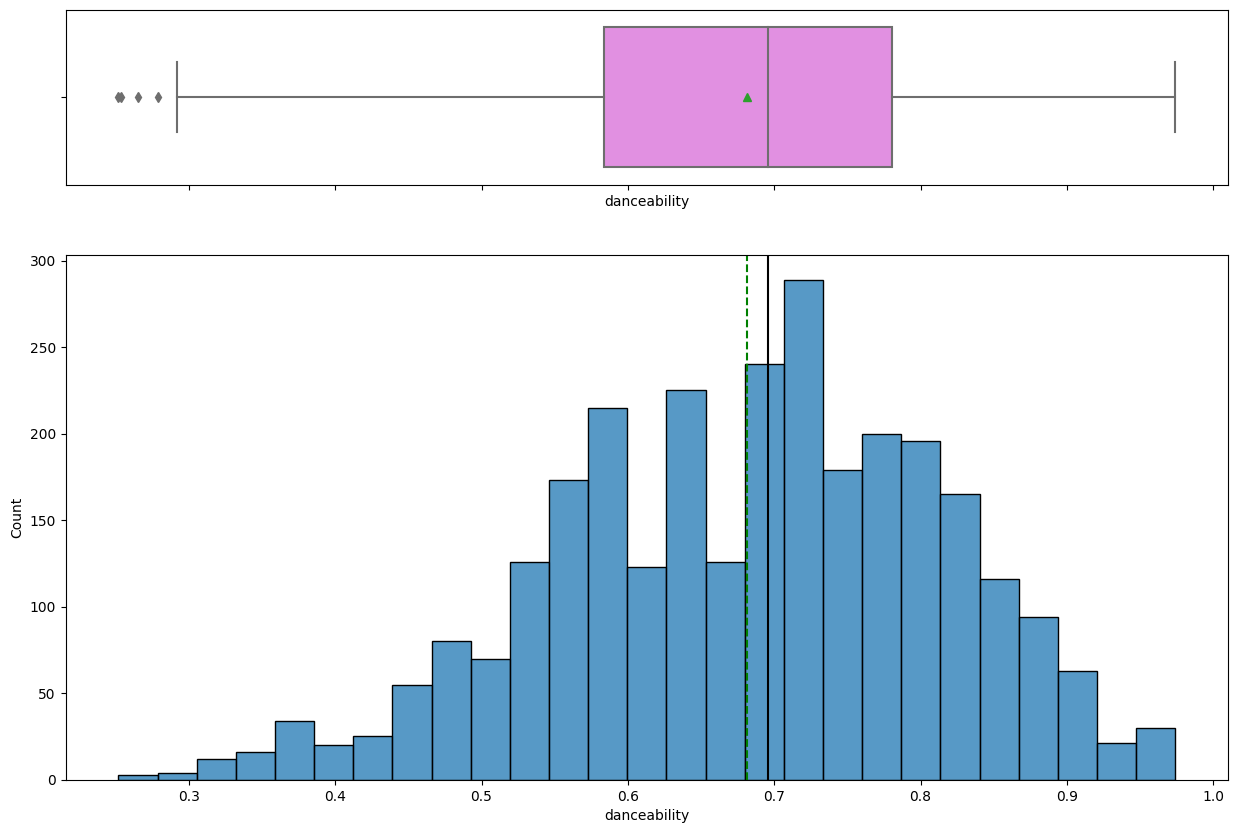

In [12]:
histogram_boxplot(data, "danceability")

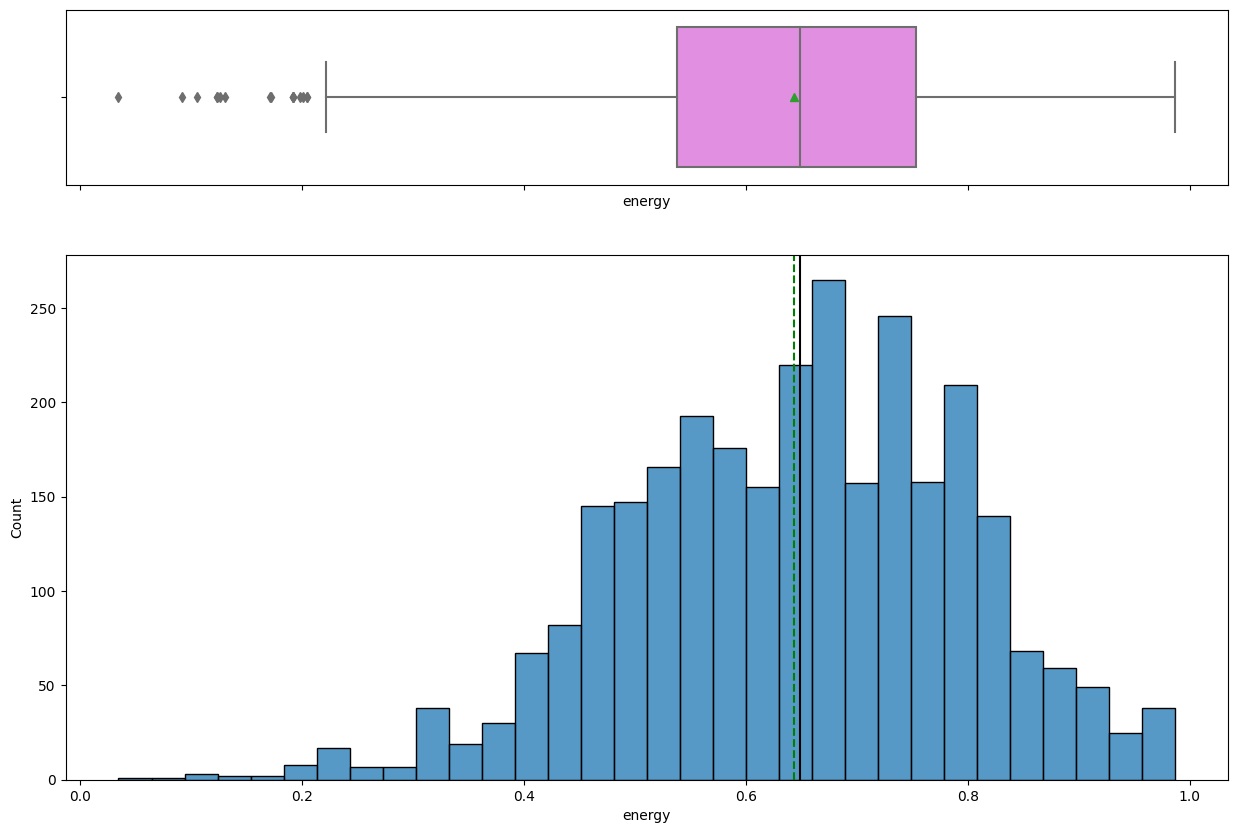

In [13]:
histogram_boxplot(data, "energy")

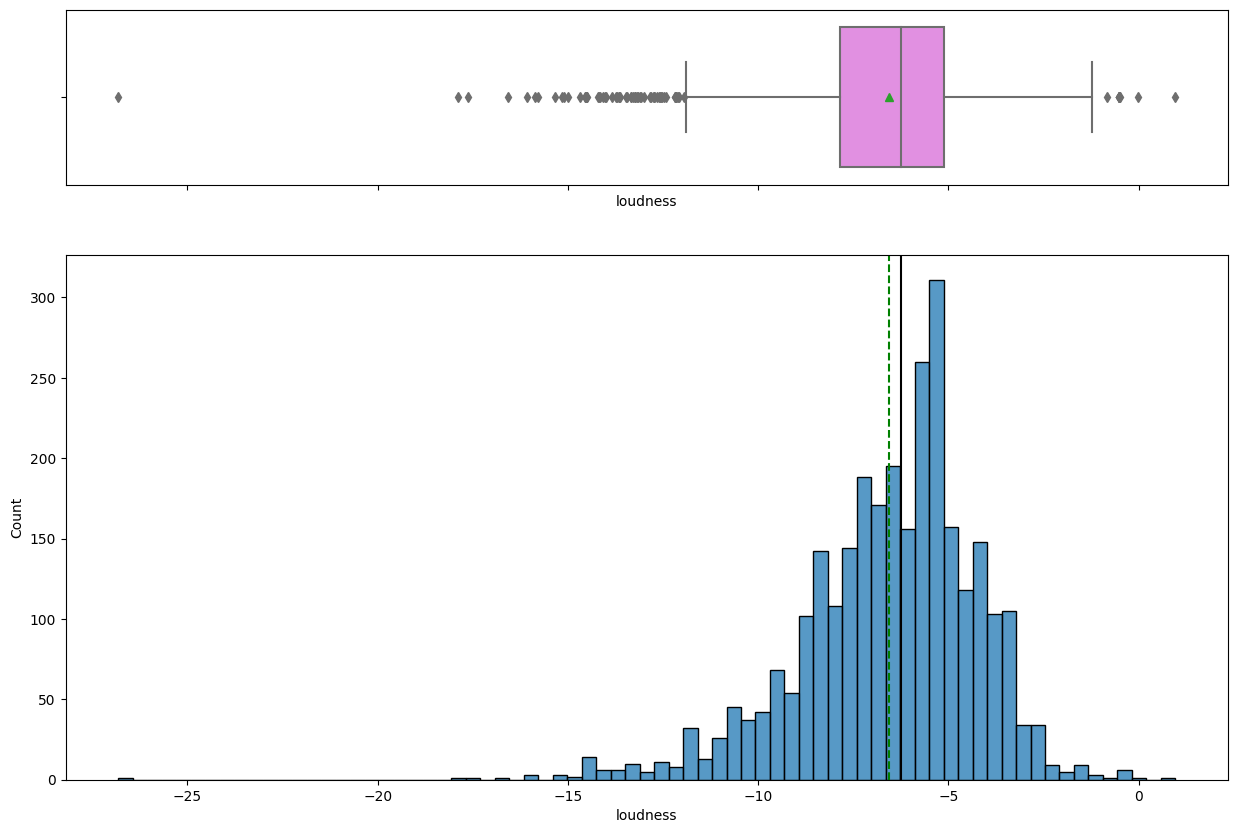

In [14]:
histogram_boxplot(data, "loudness")

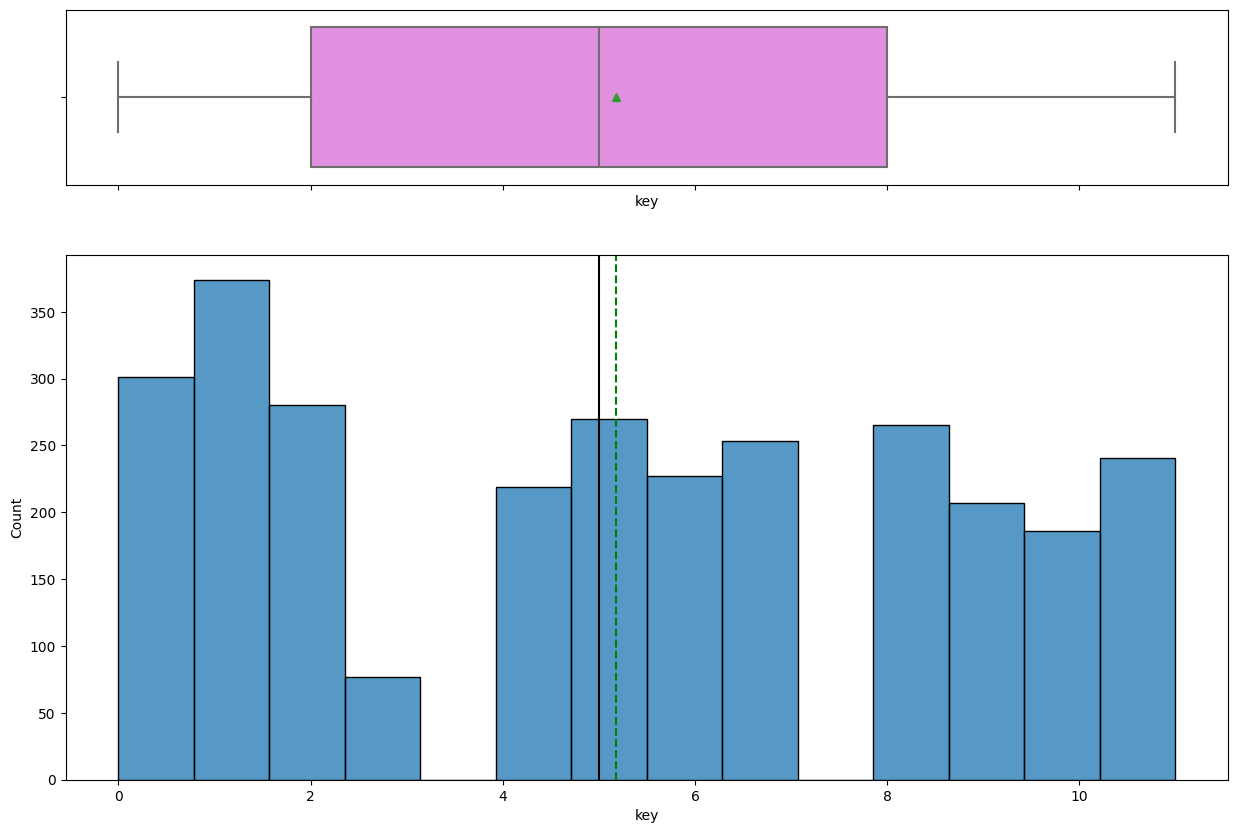

In [15]:
histogram_boxplot(data, "key")

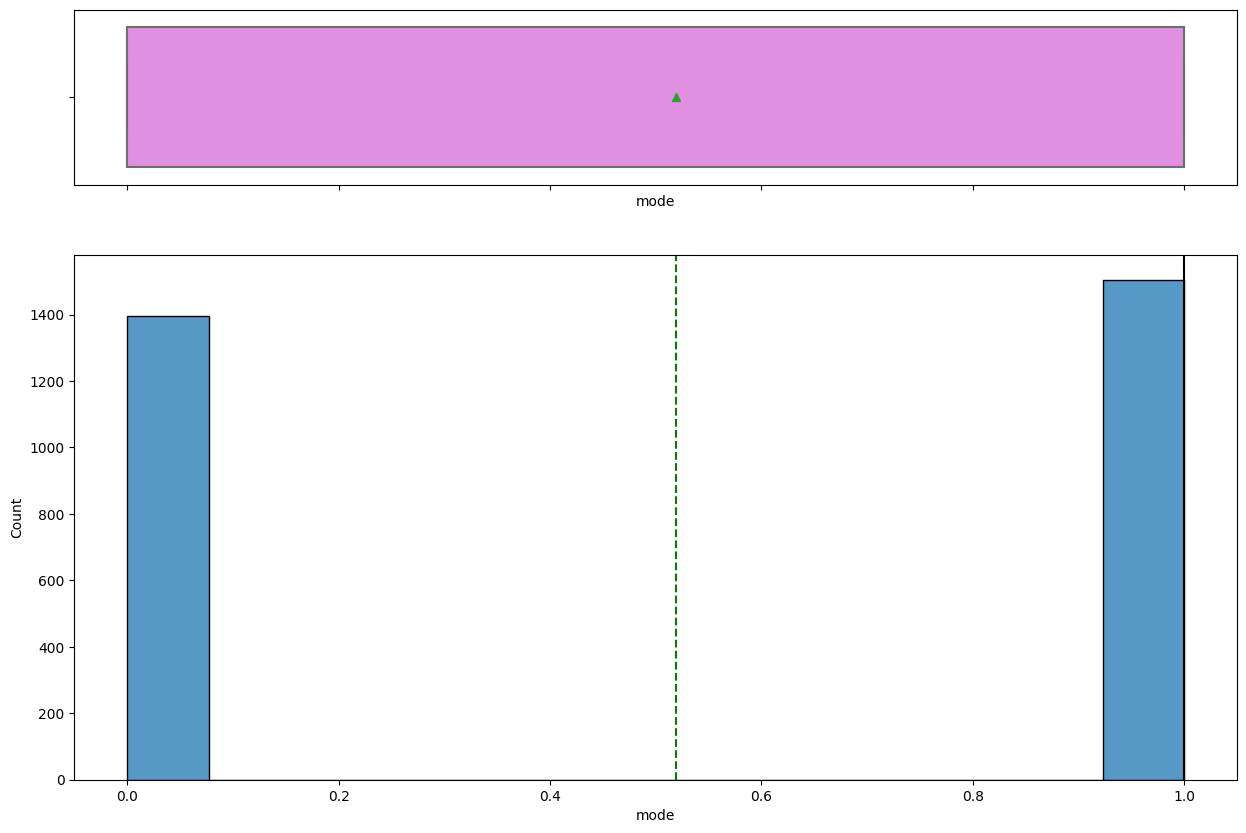

In [16]:
histogram_boxplot(data, "mode")

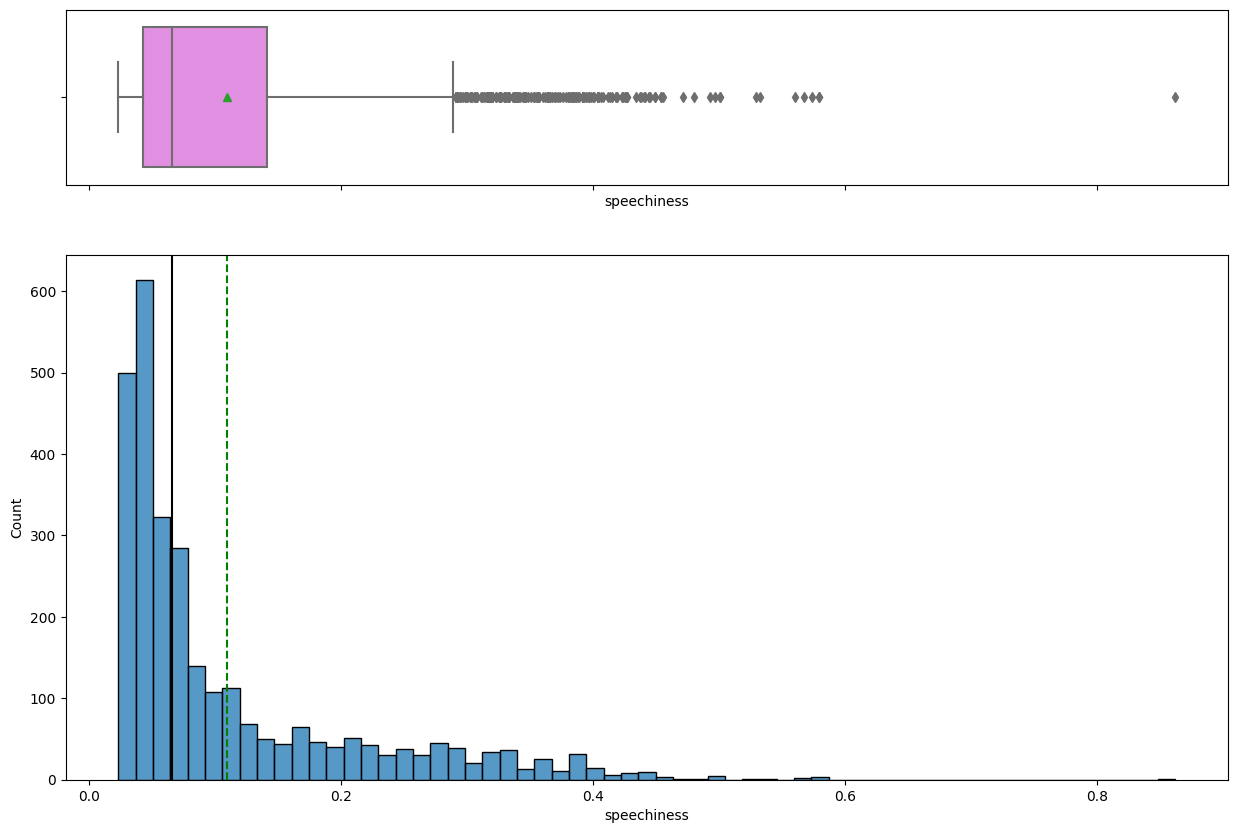

In [17]:
histogram_boxplot(data, "speechiness")

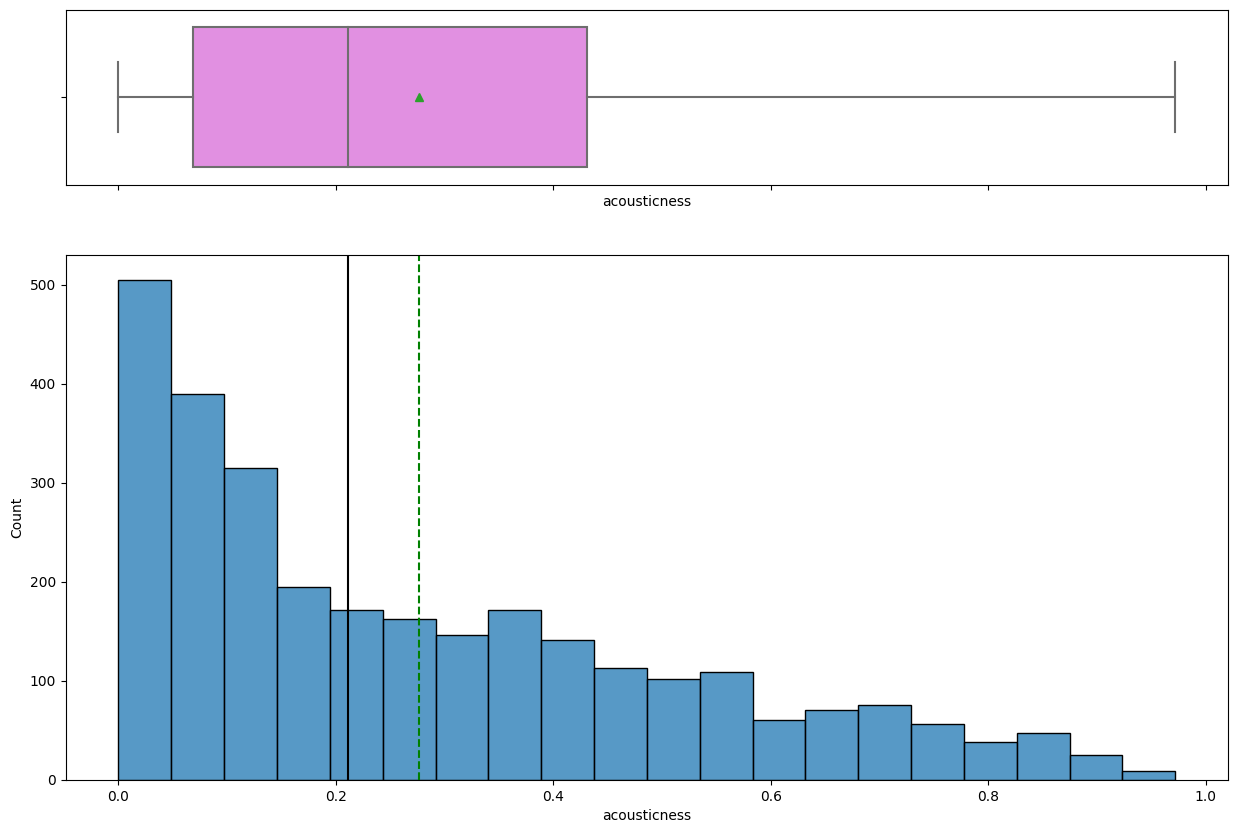

In [18]:
histogram_boxplot(data, "acousticness")

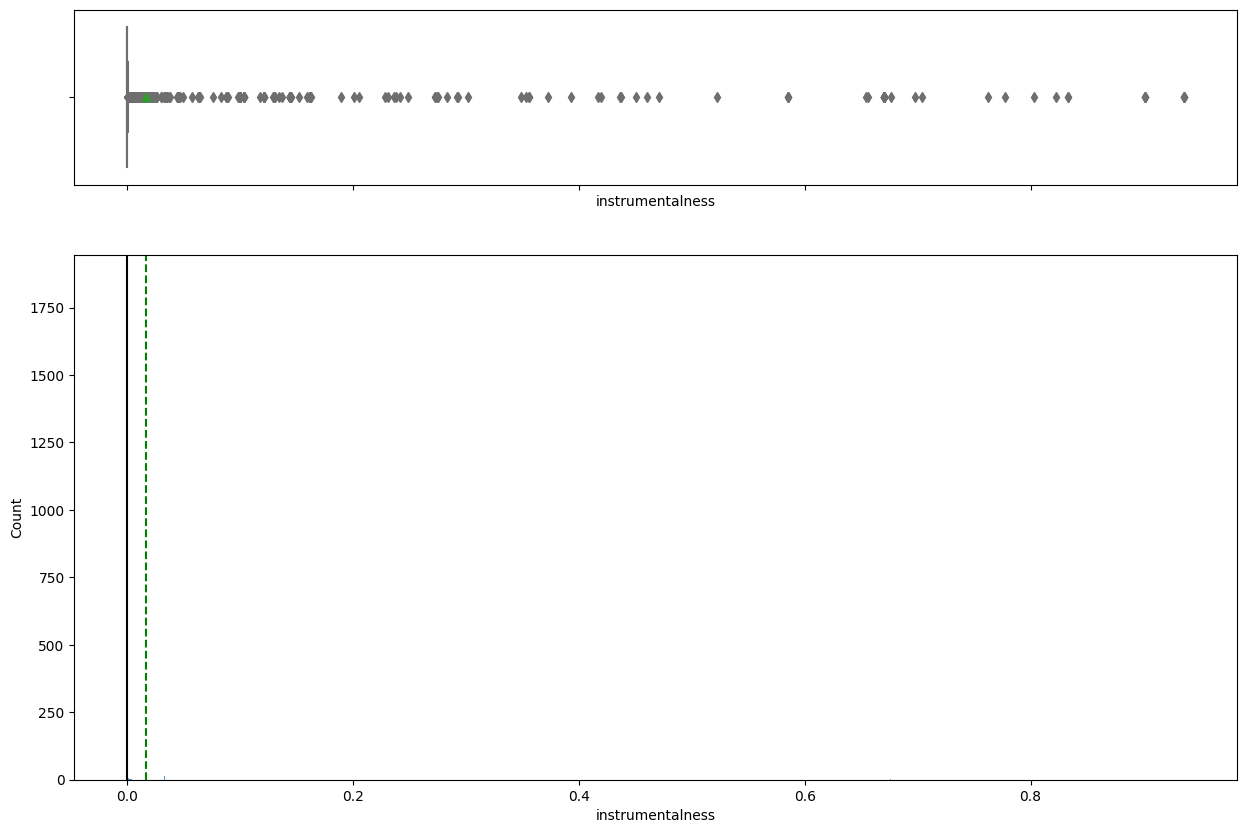

In [19]:
histogram_boxplot(data, "instrumentalness")

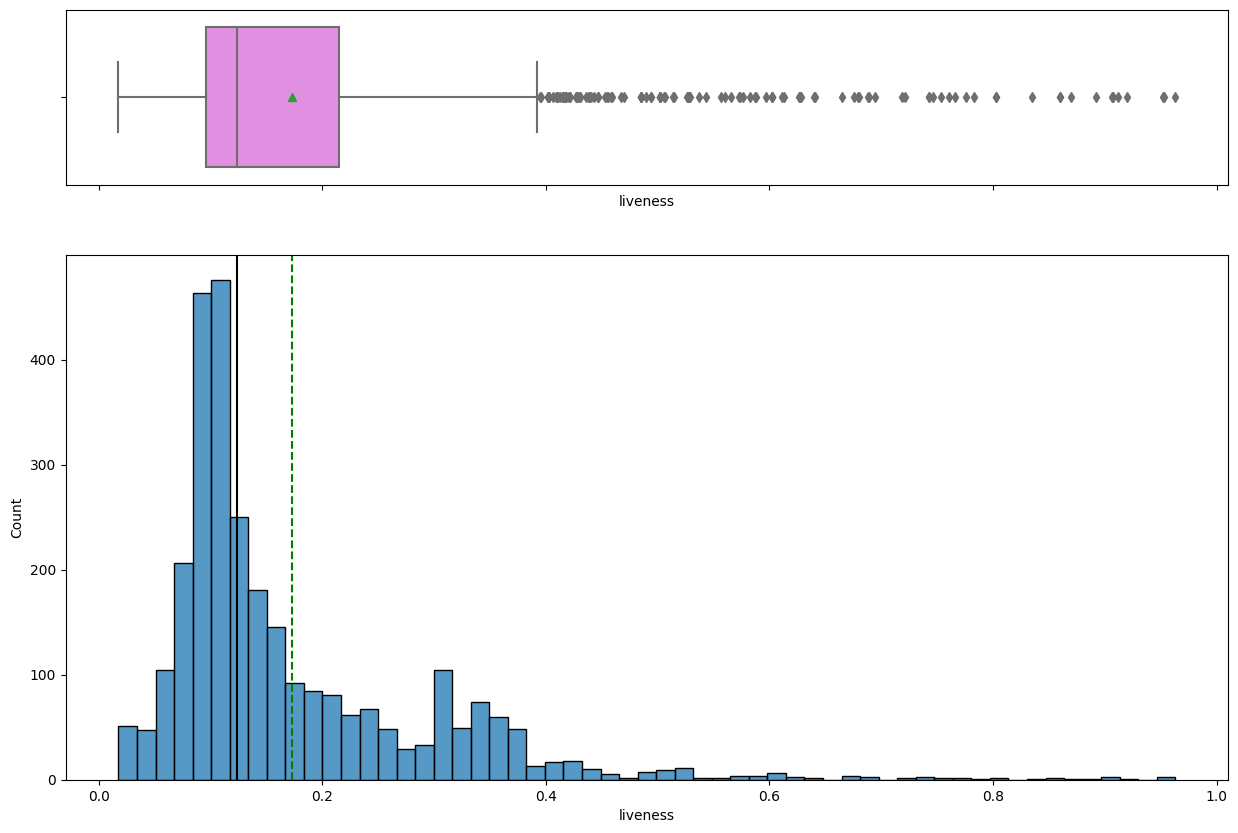

In [20]:
histogram_boxplot(data, "liveness")

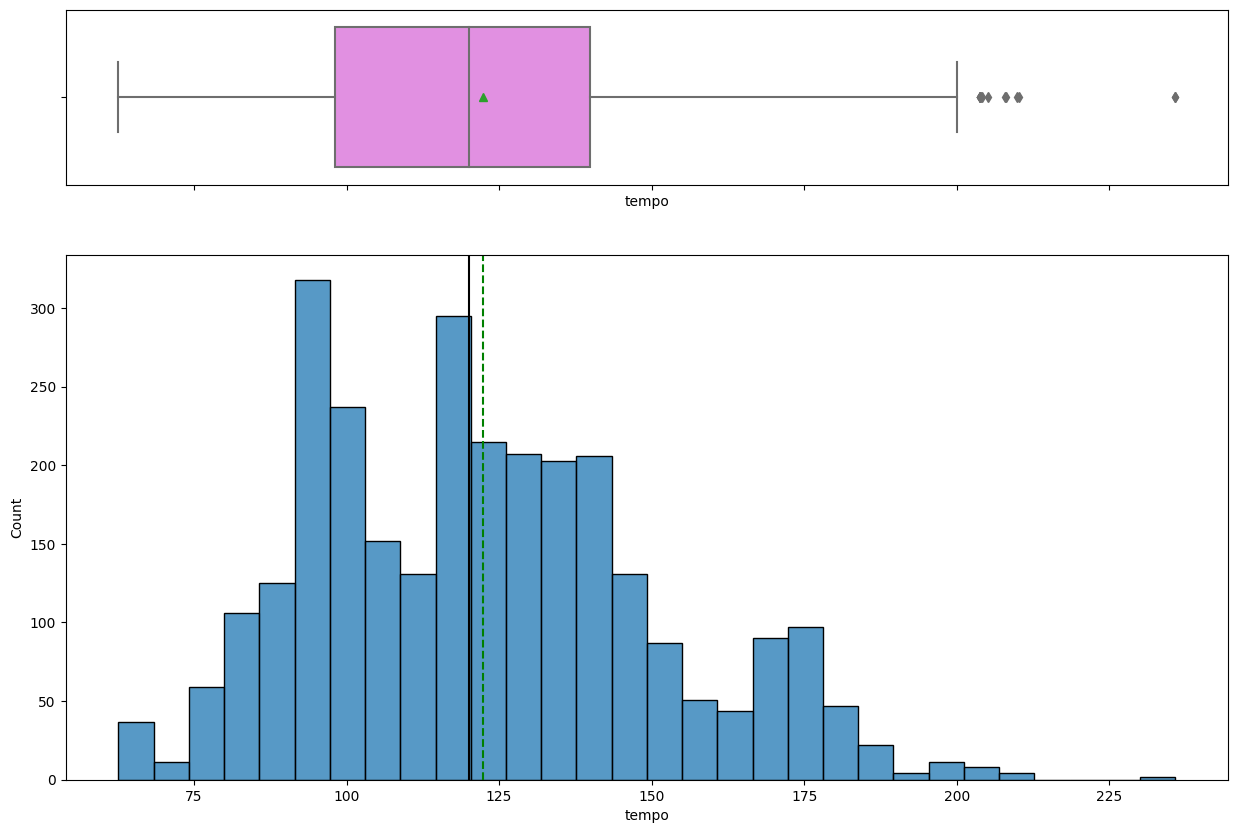

In [21]:
histogram_boxplot(data, "tempo")

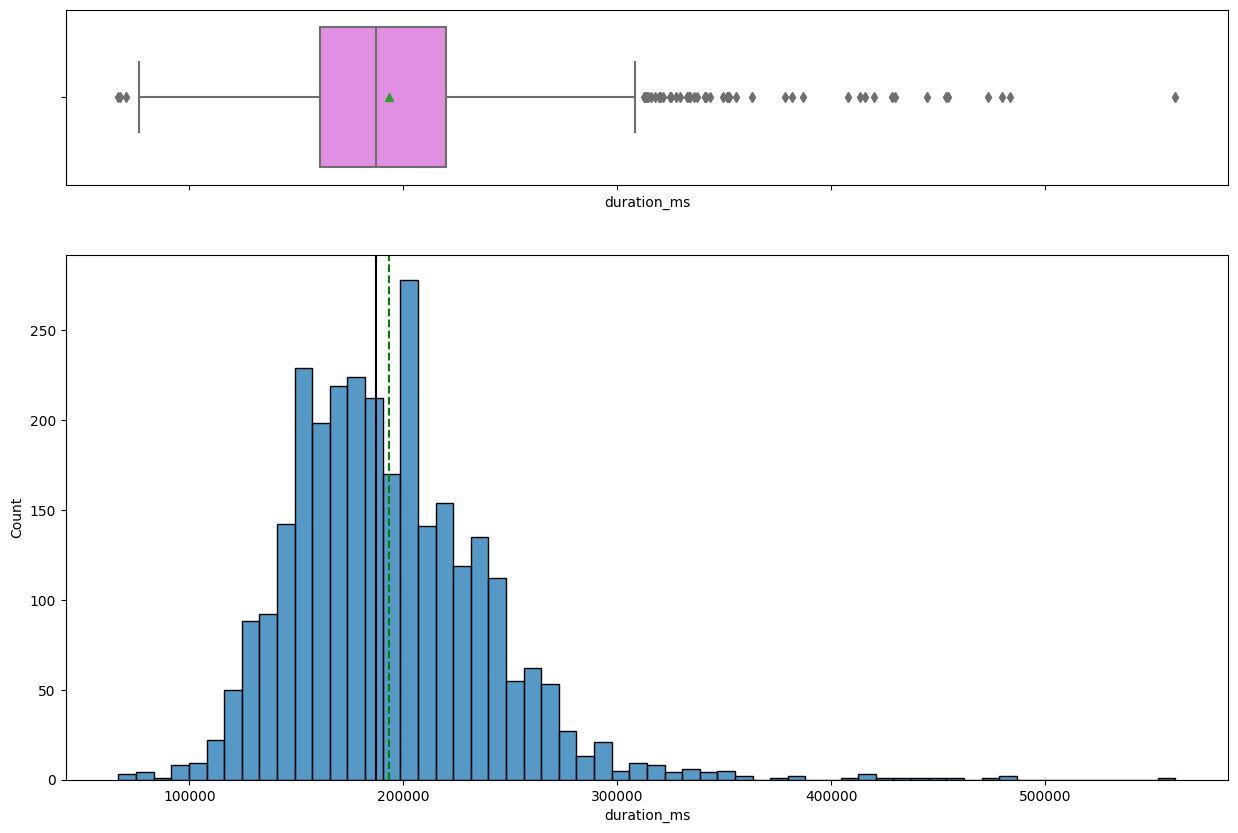

In [22]:
histogram_boxplot(data, "duration_ms")

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# **Outlier Check**

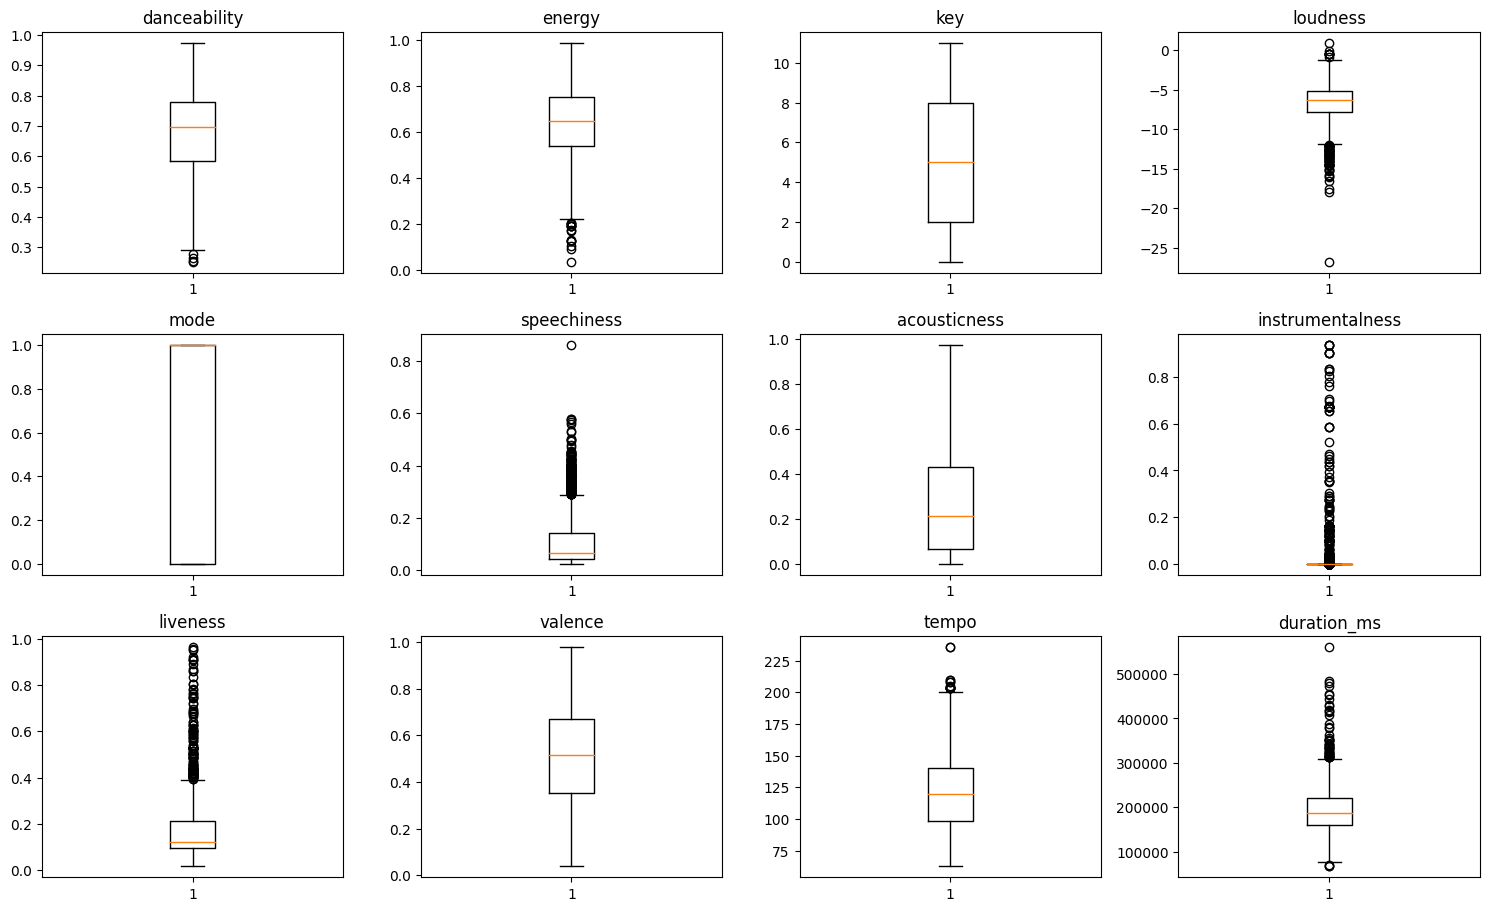

In [34]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping Playlist

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()